# Implementation of LSTM on Nifty 50 Dataset 

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error,r2_score
import warnings
import seaborn as sns
import tensorflow as tf

In [31]:
warnings.filterwarnings("ignore")

In [32]:
# Load the data
nifty_50_df = pd.read_csv("nifty_historical_data 2007 - 2023.csv")

In [33]:
print(nifty_50_df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [34]:
# Convert the 'Date' column to datetime and set it as the index
nifty_50_df['Date'] = pd.to_datetime(nifty_50_df['Date'])
nifty_50_df.set_index('Date', inplace=True)

In [35]:
nifty_50_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0.0
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0.0
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0.0
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0.0
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0.0


In [46]:
#Checking null value
print("Nifty50:\n",nifty_50_df.isnull().sum())

Nifty50:
 Open         30
High         30
Low          30
Close        30
Adj Close    30
Volume       30
dtype: int64


In [47]:
#dealing with missing values by thaking its previous value
nifty_50_df = nifty_50_df.ffill()

In [48]:
print("Nifty50:\n",nifty_50_df.isnull().sum())

Nifty50:
 Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


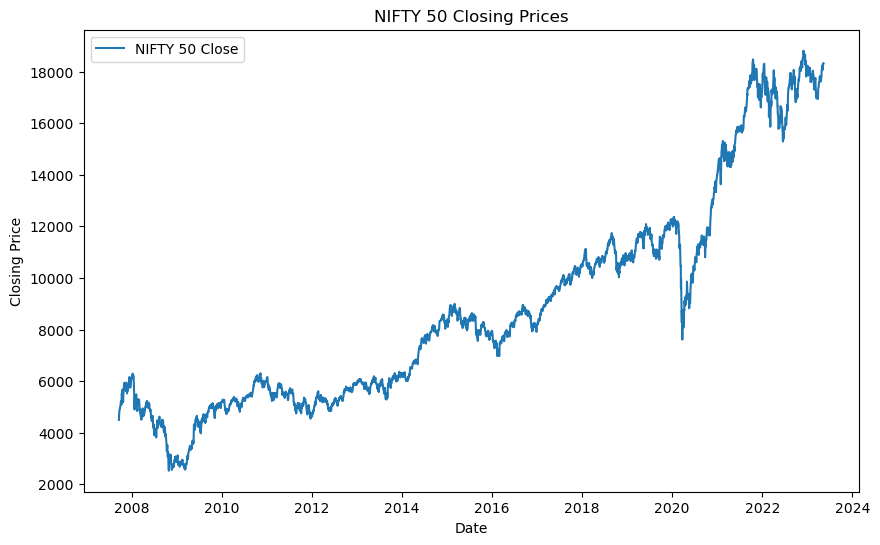

In [49]:
# Plot the closing prices
plt.figure(figsize=(10, 6))
plt.plot(nifty_50_df['Close'], label='NIFTY 50 Close')
plt.title('NIFTY 50 Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

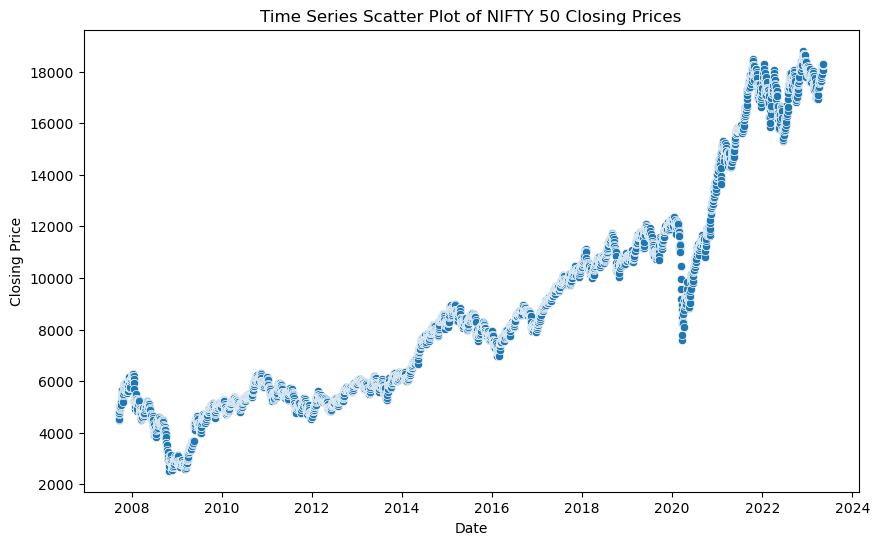

In [50]:
# Time Series Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=nifty_50_df.index, y=nifty_50_df['Close'])
plt.title('Time Series Scatter Plot of NIFTY 50 Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

In [51]:
# Prepare the data for modeling
data = nifty_50_df[['Close']].values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [52]:
# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.7)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

In [53]:
# Create a function to create datasets for training and testing
def create_dataset(dataset, time_step):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

In [54]:
# Create the training and testing datasets
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [55]:
# Reshape the data for GRU layers
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [56]:
# Create the GRU model
model = Sequential()
model.add(LSTM(200, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.4))
model.add(LSTM(160, return_sequences=False))
model.add(Dense(50))
model.add(Dense(1))

In [57]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[tf.keras.metrics.MeanAbsolutePercentageError()])

In [58]:
# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 33s 316ms/step - loss: 0.0080 - mean_absolute_percentage_error: 203573.7656 - val_loss: 4.3550e-04 - val_mean_absolute_percentage_error: 2.2656
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 28s 338ms/step - loss: 1.7831e-04 - mean_absolute_percentage_error: 15342.6904 - val_loss: 4.5948e-04 - val_mean_absolute_percentage_error: 2.3596
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 25s 300ms/step - loss: 1.4571e-04 - mean_absolute_percentage_error: 4694.4648 - val_loss: 4.3880e-04 - val_mean_absolute_percentage_error: 2.2944
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 25s 304ms/step - loss: 1.5509e-04 - mean_absolute_percentage_error: 24328.0801 - val_loss: 7.2100e-04 - val_mean_absolute_percentage_error: 3.1265
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 25s 309ms/step - loss: 1.3001e-04 - mean_absolute_percentage_error: 5624.0288 - val_loss: 3.9727e-04 - val_mean_absolute_percentage_error: 2.1927
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 25s 298ms/step - loss: 1.2121e-04 - mean_a

82/82 ━━━━━━━━━━━━━━━━━━━━ 24s 298ms/step - loss: 6.3622e-05 - mean_absolute_percentage_error: 7051.9526 - val_loss: 6.1407e-04 - val_mean_absolute_percentage_error: 2.9900
Epoch 39/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 24s 299ms/step - loss: 8.1776e-05 - mean_absolute_percentage_error: 1918.2289 - val_loss: 0.0010 - val_mean_absolute_percentage_error: 3.9135
Epoch 40/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 25s 300ms/step - loss: 8.7765e-05 - mean_absolute_percentage_error: 1349.2686 - val_loss: 2.4536e-04 - val_mean_absolute_percentage_error: 1.7277
Epoch 41/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 25s 301ms/step - loss: 8.3089e-05 - mean_absolute_percentage_error: 62924.5430 - val_loss: 2.9591e-04 - val_mean_absolute_percentage_error: 2.0054
Epoch 42/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 26s 313ms/step - loss: 7.8656e-05 - mean_absolute_percentage_error: 17067.5938 - val_loss: 8.2351e-04 - val_mean_absolute_percentage_error: 3.4844
Epoch 43/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 24s 298ms/step - loss: 7.0303e-05 - mean_absolute_

In [59]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

82/82 ━━━━━━━━━━━━━━━━━━━━ 9s 102ms/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step


In [60]:
# Inverse transform the predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [61]:
# Inverse transform the original values
original_y_train = scaler.inverse_transform([y_train])
original_y_test = scaler.inverse_transform([y_test])

In [62]:
# Create plots for the predicted values
train_predict_plot = np.empty_like(scaled_data)
train_predict_plot[:, :] = np.nan
train_predict_plot[time_step:len(train_predict) + time_step, :] = train_predict

In [63]:
test_predict_plot = np.empty_like(scaled_data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (time_step * 2) + 1:len(scaled_data) - 1, :] = test_predict

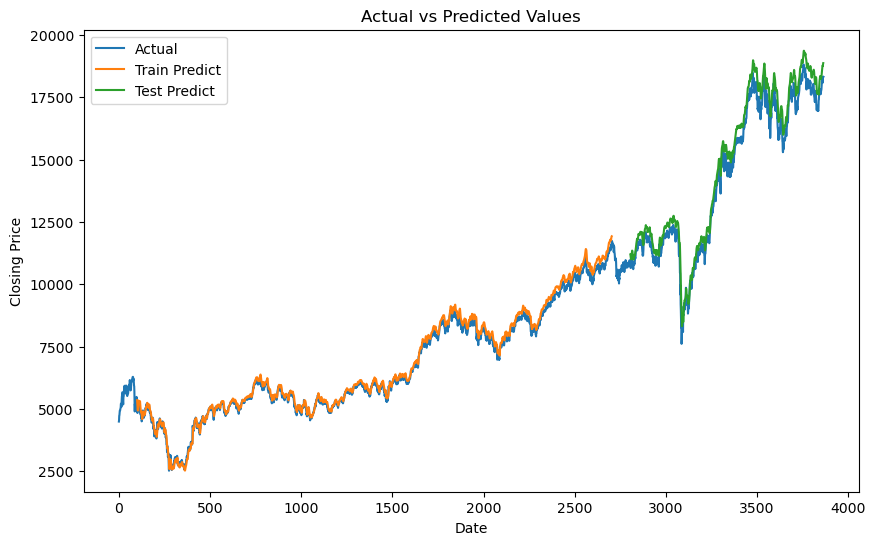

In [64]:
plt.figure(figsize=(10, 6))
plt.plot(scaler.inverse_transform(scaled_data), label='Actual')
plt.plot(train_predict_plot, label='Train Predict')
plt.plot(test_predict_plot, label='Test Predict')
plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

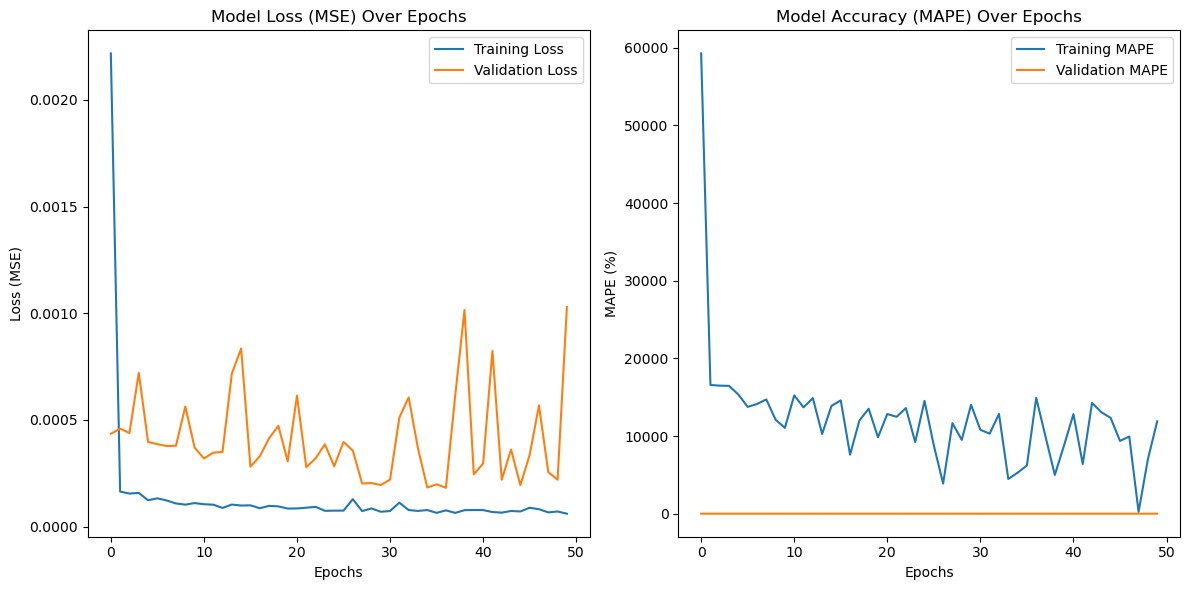

In [65]:
# Plot the model loss and MAPE over epochs
plt.figure(figsize=(12, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss (MSE) Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()

# Plot MAPE
plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_percentage_error'], label='Training MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='Validation MAPE')
plt.title('Model Accuracy (MAPE) Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MAPE (%)')
plt.legend()

plt.tight_layout()
plt.show()

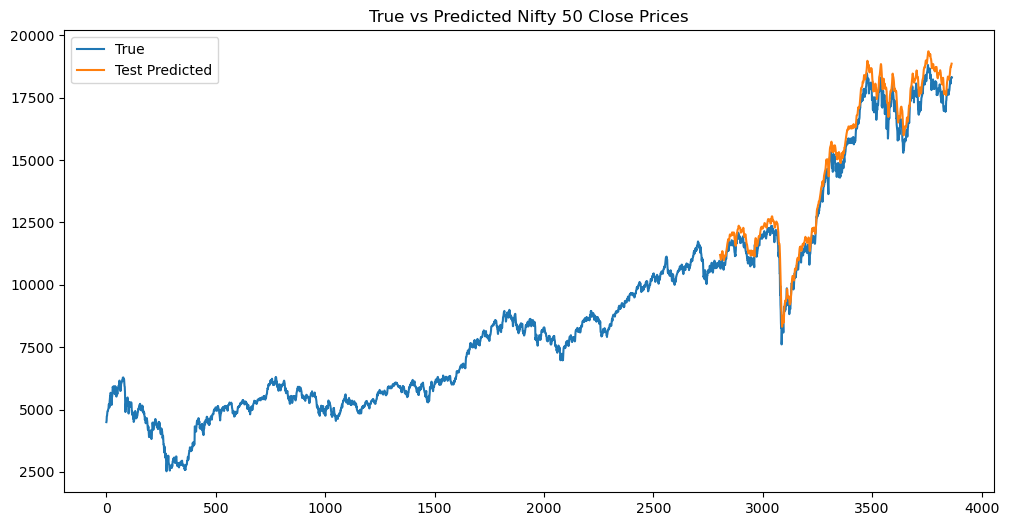

In [66]:
# Plot true vs predicted residuals
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(scaled_data), label="True")
plt.plot(test_predict_plot, label="Test Predicted")
plt.title("True vs Predicted Nifty 50 Close Prices")
plt.legend()
plt.show()

In [67]:
# Calculate R² score, rmse, mae, mse, mate, smate for training and testing sets
train_r2 = r2_score(original_y_train[0], train_predict[:, 0])
test_r2 = r2_score(original_y_test[0], test_predict[:, 0])

train_rmse = np.sqrt(mean_squared_error(original_y_train[0], train_predict[:, 0]))
test_rmse = np.sqrt(mean_squared_error(original_y_test[0], test_predict[:, 0]))

train_mae = mean_absolute_error(original_y_train[0], train_predict[:, 0])
test_mae = mean_absolute_error(original_y_test[0], test_predict[:, 0])

train_mse = mean_squared_error(original_y_train[0], train_predict[:, 0])
test_mse = mean_squared_error(original_y_test[0], test_predict[:, 0])

train_mate = median_absolute_error(original_y_train[0], train_predict[:, 0])
test_mate = median_absolute_error(original_y_test[0], test_predict[:, 0])

train_smate = np.sqrt(mean_squared_error(original_y_train[0], train_predict[:, 0])) / np.mean(original_y_train)
test_smate = np.sqrt(mean_squared_error(original_y_test[0], test_predict[:, 0])) / np.mean(original_y_test)

print(f'Train R²: {train_r2}')
print(f'Test R²: {test_r2}')

print("Training RMSE: ", train_rmse)
print("Testing RMSE: ", test_rmse)

print("Training MAE: ", train_mae)
print("Testing MAE: ", test_mae)

print("Training MSE: ", train_mse)
print("Testing MSE: ", test_mse)

print("Training MATE: ", train_mate)
print("Testing MATE: ", test_mate)

print("Training SMATE: ", train_smate)
print("Testing SMATE: ", test_smate)

Train R²: 0.9924928496698104
Test R²: 0.9688815531124486
Training RMSE:  179.5418534142321
Testing RMSE:  522.6849351823622
Training MAE:  144.10098663742085
Testing MAE:  468.14306593395895
Training MSE:  32235.27712741761
Testing MSE:  273199.5414665902
Training MATE:  120.384521484375
Testing MATE:  435.3339847499992
Training SMATE:  0.026940245413580685
Testing SMATE:  0.03647211116292028


In [68]:
from tabulate import tabulate
import numpy as np
# Create a table
table = [
    ["Metric", "Training", "Testing"],
    ["R² Score", f"{train_r2:.4f}", f"{test_r2:.4f}"],
    ["RMSE", f"{train_rmse:.4f}", f"{test_rmse:.4f}"],
    ["MSE", f"{train_mse:.4f}", f"{test_mse:.4f}"],
    ["MAE", f"{train_mae:.4f}", f"{test_mae:.4f}"],
    ["MATE", f"{train_mate:.4f}", f"{test_mate:.4f}"],
    ["SMATE", f"{train_smate:.4f}", f"{test_smate:.4f}"]
]

print(tabulate(table, headers="firstrow", tablefmt="grid"))

+----------+------------+-------------+
| Metric   |   Training |     Testing |
+==========+============+=============+
| R² Score |     0.9925 |      0.9689 |
+----------+------------+-------------+
| RMSE     |   179.542  |    522.685  |
+----------+------------+-------------+
| MSE      | 32235.3    | 273200      |
+----------+------------+-------------+
| MAE      |   144.101  |    468.143  |
+----------+------------+-------------+
| MATE     |   120.385  |    435.334  |
+----------+------------+-------------+
| SMATE    |     0.0269 |      0.0365 |
+----------+------------+-------------+
